<a href="https://colab.research.google.com/github/pravin-raut/MachineLearning/blob/Master/dissertation/01_Arima_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
!pip install quandl
!pip install yfinance
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [154]:
import yfinance as yf
import pandas as pd
from datetime import datetime,timedelta
import quandl
import json

In [155]:
# Open the file for reading and load the data from it
with open("/content/drive/MyDrive/Configuration/Config.json", "r") as infile:
  data = json.load(infile)
# Set up API key
  api_key=data["nasdaq"]["api_key"]
quandl.ApiConfig.api_key = api_key


In [156]:
CurrentDate = (datetime.today() - timedelta(days=2)).strftime('%Y-%m-%d')
CurrentDate

'2023-06-13'

In [157]:
DayBefore1000 = (datetime.today() - timedelta(days=2000)).strftime('%Y-%m-%d')
DayBefore1000


'2017-12-23'

In [158]:
def getDataFromAPI(API,symbol,start_date,end_date):

  if API=="YFinance":
    # Create a ticker object
    ticker = yf.Ticker(symbol)
    # Download historical data
    data = ticker.history(period="1d", start=start_date, end=end_date)

  if API=="Nasdaq":
    data = quandl.get(symbol,start_date=start_date,end_date=end_date)


  return data

In [159]:
OilPriceInUSD=getDataFromAPI("Nasdaq","OPEC/ORB",DayBefore1000,CurrentDate).reset_index()
OilPriceInUSD['Date'] = pd.to_datetime(OilPriceInUSD['Date']).dt.date
OilPriceInUSD.set_index('Date', inplace=True)
OilPriceInUSD

,Value
Date,
2017-12-26,63.07
2017-12-27,64.24
2017-12-28,64.17
2017-12-29,64.47
2018-01-02,64.84
...,...
2023-06-07,76.03
2023-06-08,76.55
2023-06-09,75.85


In [160]:
EuroPriceInUSD=getDataFromAPI("YFinance","EURUSD=X",DayBefore1000,CurrentDate).reset_index()
EuroPriceInUSD['Date'] = pd.to_datetime(EuroPriceInUSD['Date']).dt.date
EuroPriceInUSD.set_index('Date', inplace=True)
EuroPriceInUSD

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-25,1.185677,1.188495,1.184904,1.185607,0,0.0,0.0
2017-12-26,1.187127,1.187790,1.184750,1.187254,0,0.0,0.0
2017-12-27,1.186099,1.191043,1.185565,1.185789,0,0.0,0.0
2017-12-28,1.190023,1.195500,1.189825,1.190079,0,0.0,0.0
2017-12-29,1.193987,1.202284,1.193802,1.194172,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-06,1.071180,1.073307,1.066735,1.071180,0,0.0,0.0
2023-06-07,1.069805,1.074022,1.066883,1.069805,0,0.0,0.0
2023-06-08,1.070744,1.078283,1.070217,1.070744,0,0.0,0.0


In [161]:
data=EuroPriceInUSD.merge(OilPriceInUSD, on='Date', how='inner').reset_index()
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Value
0,2017-12-26,1.187127,1.187790,1.184750,1.187254,0,0.0,0.0,63.07
1,2017-12-27,1.186099,1.191043,1.185565,1.185789,0,0.0,0.0,64.24
2,2017-12-28,1.190023,1.195500,1.189825,1.190079,0,0.0,0.0,64.17
3,2017-12-29,1.193987,1.202284,1.193802,1.194172,0,0.0,0.0,64.47
4,2018-01-02,1.201086,1.208094,1.200855,1.201158,0,0.0,0.0,64.84
...,...,...,...,...,...,...,...,...,...
1401,2023-06-06,1.071180,1.073307,1.066735,1.071180,0,0.0,0.0,75.46
1402,2023-06-07,1.069805,1.074022,1.066883,1.069805,0,0.0,0.0,76.03
1403,2023-06-08,1.070744,1.078283,1.070217,1.070744,0,0.0,0.0,76.55
1404,2023-06-09,1.078272,1.078749,1.074772,1.078272,0,0.0,0.0,75.85


In [162]:
selected_data = data[['Date', 'Close', 'Value']]
selected_data = selected_data.rename(columns={'Close': 'USD_EUR_Price', 'Value': 'Oil_Price'})
selected_data['Date'] = pd.to_datetime(selected_data['Date'])
selected_data.set_index('Date', inplace=True)
selected_data

,USD_EUR_Price,Oil_Price
Date,,
2017-12-26,1.187254,63.07
2017-12-27,1.185789,64.24
2017-12-28,1.190079,64.17
2017-12-29,1.194172,64.47
2018-01-02,1.201158,64.84
...,...,...
2023-06-06,1.071180,75.46
2023-06-07,1.069805,76.03
2023-06-08,1.070744,76.55


In [163]:
selected_data['USD_EUR_Price'].describe()


count    1406.000000
mean        1.131578
std         0.059949
min         0.959619
25%         1.096395
50%         1.131615
75%         1.177912
max         1.251001
Name: USD_EUR_Price, dtype: float64

In [164]:
selected_data['Oil_Price'].describe()


count    1406.000000
mean       69.907319
std        20.259065
min        12.220000
25%        60.660000
50%        69.385000
75%        79.960000
max       128.270000
Name: Oil_Price, dtype: float64

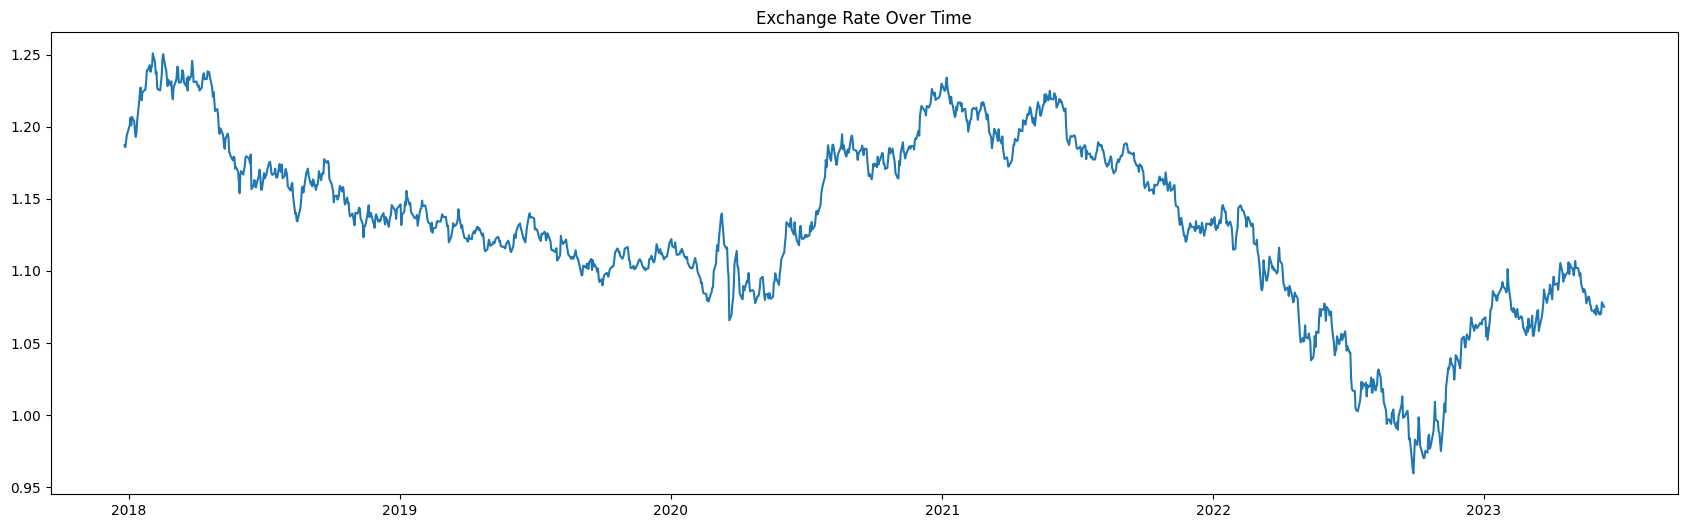

In [165]:
import matplotlib.pyplot as plt
plt.figure(figsize=(21, 6))
plt.plot(selected_data.index, selected_data['USD_EUR_Price'])
plt.title('Exchange Rate Over Time')
plt.show()


In [166]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(selected_data['USD_EUR_Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -1.593305
p-value: 0.486956


In [167]:
selected_data['USD_EUR_Price_diff'] = selected_data['USD_EUR_Price']-selected_data['USD_EUR_Price'].shift(1)
selected_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff
Date,,,
2017-12-26,1.187254,63.07,NaN
2017-12-27,1.185789,64.24,-0.001464
2017-12-28,1.190079,64.17,0.004290
2017-12-29,1.194172,64.47,0.004093
2018-01-02,1.201158,64.84,0.006986
...,...,...,...
2023-06-06,1.071180,75.46,0.001318
2023-06-07,1.069805,76.03,-0.001375
2023-06-08,1.070744,76.55,0.000939


In [168]:
from pmdarima.arima.utils import ndiffs

In [169]:
ndiffs(selected_data.USD_EUR_Price,test="adf")

1

In [170]:
result = adfuller(selected_data['USD_EUR_Price_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -36.305290
p-value: 0.000000


In [171]:
selected_data['USD_EUR_Price_diff1'] = selected_data['USD_EUR_Price'].diff()
selected_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff,USD_EUR_Price_diff1
Date,,,,
2017-12-26,1.187254,63.07,NaN,NaN
2017-12-27,1.185789,64.24,-0.001464,-0.001464
2017-12-28,1.190079,64.17,0.004290,0.004290
2017-12-29,1.194172,64.47,0.004093,0.004093
2018-01-02,1.201158,64.84,0.006986,0.006986
...,...,...,...,...
2023-06-06,1.071180,75.46,0.001318,0.001318
2023-06-07,1.069805,76.03,-0.001375,-0.001375
2023-06-08,1.070744,76.55,0.000939,0.000939


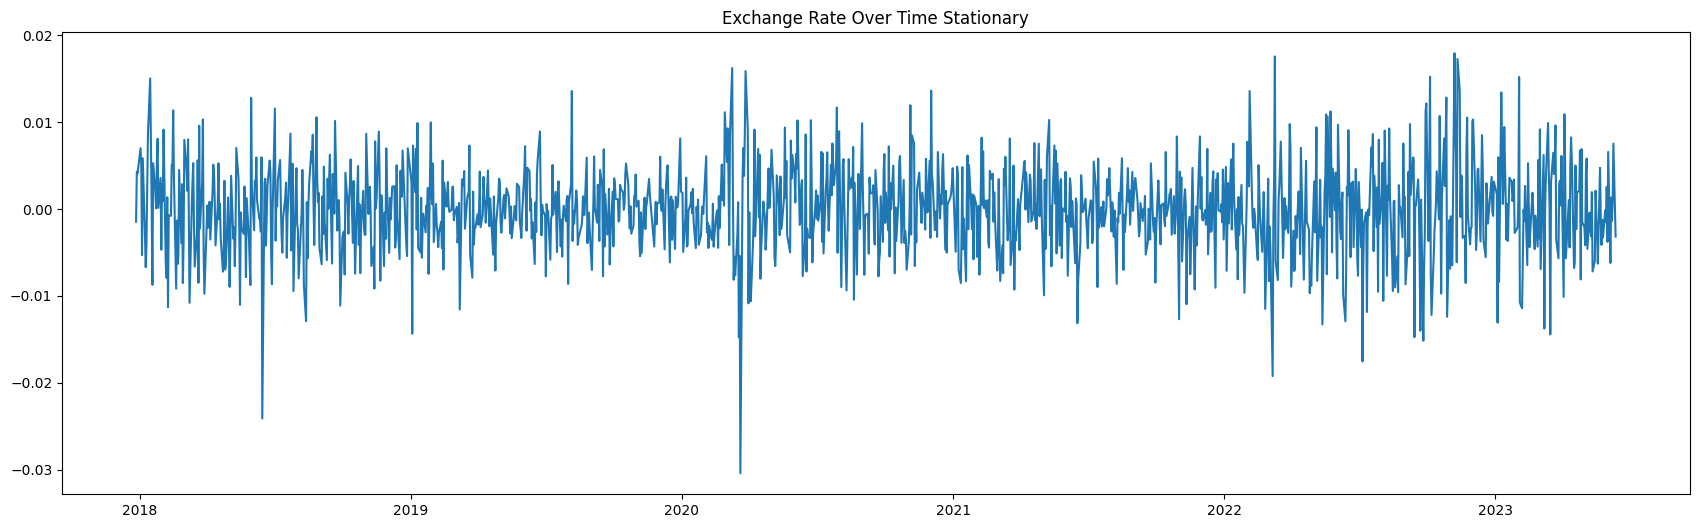

In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize=(21, 6))
plt.plot(selected_data.index, selected_data['USD_EUR_Price_diff'])
plt.title('Exchange Rate Over Time Stationary')
plt.show()


In [173]:
# Assuming 'selected_data' is a DataFrame containing the 'USD_EUR_Price' column
# Perform an 80-20 split for training and testing
train_data_size = int(0.8 * len(selected_data))
train_data = selected_data.iloc[:train_data_size]
test_data = selected_data.iloc[train_data_size:]

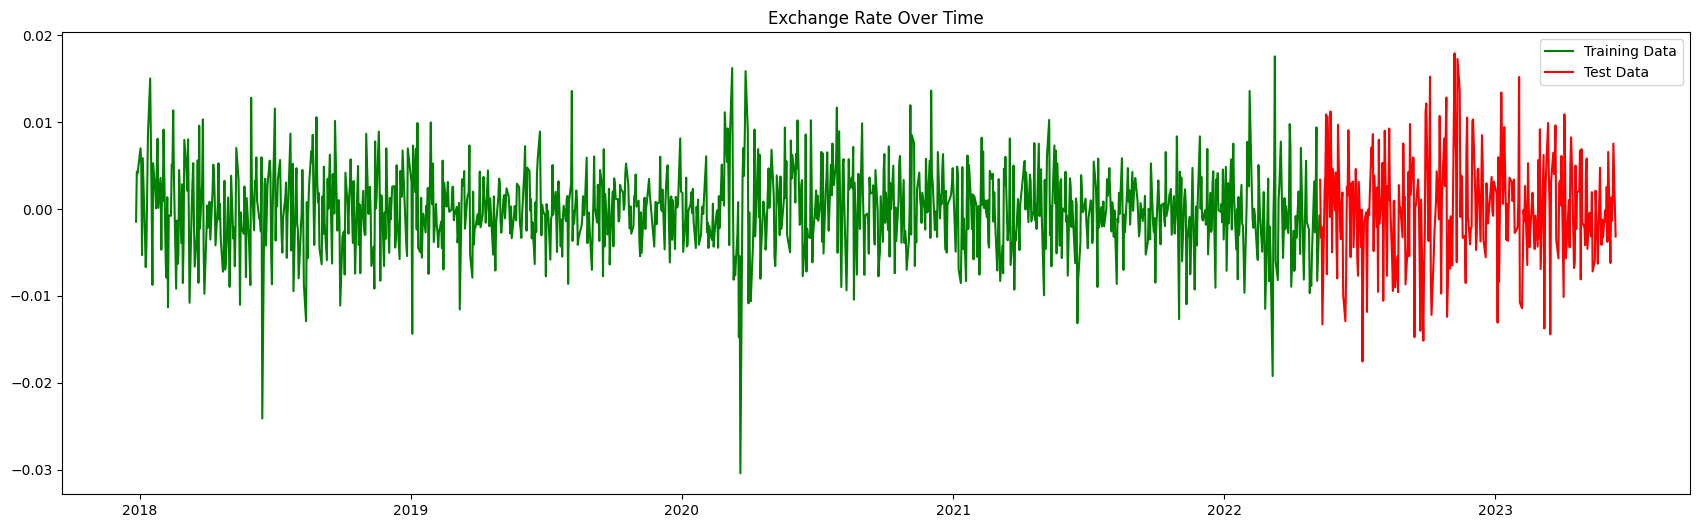

In [174]:
import matplotlib.pyplot as plt

# Plotting the entire data
plt.figure(figsize=(21, 6))

# Plotting the training data
plt.plot(train_data.index, train_data['USD_EUR_Price_diff'], color='green', label='Training Data')

# Plotting the test data
plt.plot(test_data.index, test_data['USD_EUR_Price_diff'], color='red', label='Test Data')

plt.title('Exchange Rate Over Time')
plt.legend()
plt.show()


In [175]:
print('Training data shape: ', train_data.shape)
print('Test data shape: ', test_data.shape)

Training data shape:  (1124, 4)
Test data shape:  (282, 4)


In [176]:
selected_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff,USD_EUR_Price_diff1
Date,,,,
2017-12-26,1.187254,63.07,NaN,NaN
2017-12-27,1.185789,64.24,-0.001464,-0.001464
2017-12-28,1.190079,64.17,0.004290,0.004290
2017-12-29,1.194172,64.47,0.004093,0.004093
2018-01-02,1.201158,64.84,0.006986,0.006986
...,...,...,...,...
2023-06-06,1.071180,75.46,0.001318,0.001318
2023-06-07,1.069805,76.03,-0.001375,-0.001375
2023-06-08,1.070744,76.55,0.000939,0.000939


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


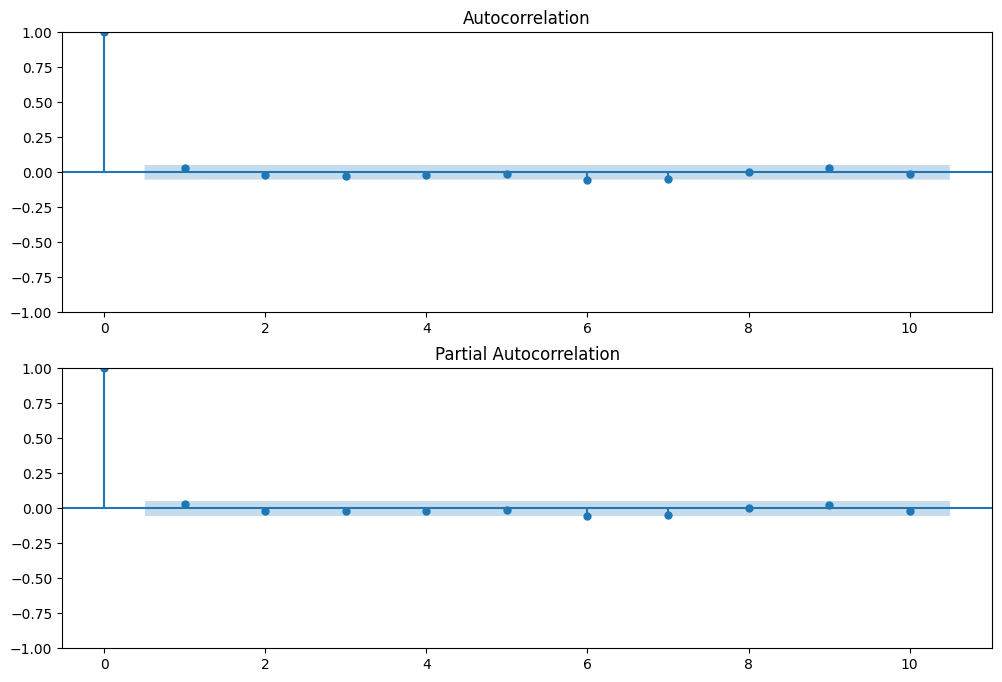

In [177]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot the ACF of the differenced series
plot_acf(selected_data['USD_EUR_Price_diff'].dropna(),lags=10 ,ax=ax1)

# Plot the PACF of the differenced series
plot_pacf(selected_data['USD_EUR_Price_diff'].dropna(),lags=10, ax=ax2)

plt.show()


In [178]:
train_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff,USD_EUR_Price_diff1
Date,,,,
2017-12-26,1.187254,63.07,NaN,NaN
2017-12-27,1.185789,64.24,-0.001464,-0.001464
2017-12-28,1.190079,64.17,0.004290,0.004290
2017-12-29,1.194172,64.47,0.004093,0.004093
2018-01-02,1.201158,64.84,0.006986,0.006986
...,...,...,...,...
2022-05-03,1.050906,109.70,-0.002691,-0.002691
2022-05-04,1.052853,110.73,0.001947,0.001947
2022-05-05,1.062248,112.94,0.009395,0.009395


In [179]:
from statsmodels.tsa.arima.model import ARIMA


In [180]:

model=ARIMA(train_data['USD_EUR_Price'],order=(6,1,1))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [181]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          USD_EUR_Price   No. Observations:                 1124
Model:                 ARIMA(6, 1, 1)   Log Likelihood                4414.637
Date:                Thu, 15 Jun 2023   AIC                          -8813.273
Time:                        14:53:27   BIC                          -8773.083
Sample:                             0   HQIC                         -8798.084
                               - 1124                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0198      0.632      0.031      0.975      -1.220       1.259
ar.L2         -0.0131      0.037     -0.357      0.721      -0.085       0.059
ar.L3         -0.0060      0.028     -0.214      0.830      -0.060       0.049
ar.L4         -0.0434      0.029     -1.479      0.139      -0.101       0.014
ar.L5         -0.0199      0.039     -0.517      0.605      -0.095       0.056
ar.L6         -0.0413      0.033     -1.266      0.206      -0.105       0.023
ma.L1          0.0203      0.634      0.032      0.974      -1.222       1.263
sigma2      2.253e-05   6.91e-07     32.589      0.000    2.12e-05    2.39e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               279.62
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.30
Prob(H) (two-sided):                  0.23   Kurtosis:                         5.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [183]:
test_data.index

DatetimeIndex(['2022-05-10', '2022-05-11', '2022-05-12', '2022-05-13',
               '2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19',
               '2022-05-20', '2022-05-23',
               ...
               '2023-05-30', '2023-05-31', '2023-06-01', '2023-06-02',
               '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08',
               '2023-06-09', '2023-06-12'],
              dtype='datetime64[ns]', name='Date', length=282, freq=None)

In [184]:
test_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff,USD_EUR_Price_diff1
Date,,,,
2022-05-10,1.056580,108.08,0.003361,0.003361
2022-05-11,1.053297,108.92,-0.003283,-0.003283
2022-05-12,1.051248,109.20,-0.002048,-0.002048
2022-05-13,1.037958,112.27,-0.013290,-0.013290
2022-05-16,1.040063,112.98,0.002105,0.002105
...,...,...,...,...
2023-06-06,1.071180,75.46,0.001318,0.001318
2023-06-07,1.069805,76.03,-0.001375,-0.001375
2023-06-08,1.070744,76.55,0.000939,0.000939


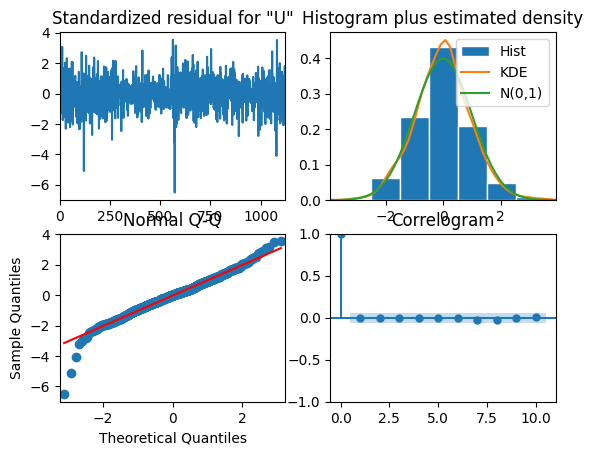

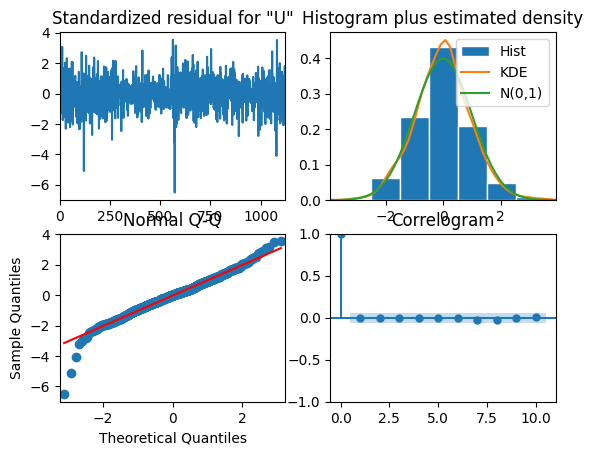

In [186]:
model_fit.plot_diagnostics()

In [197]:
forecast = model_fit.get_forecast(steps=len(test_data))

# Create a new dataframe to hold the forecast
df_forecast = forecast.conf_int()

# Create a new column for the forecasted values
df_forecast['forecast'] = forecast.predicted_mean

df_forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,lower USD_EUR_Price,upper USD_EUR_Price,forecast
1124,1.043781,1.062386,1.053084
1125,1.039383,1.066226,1.052805
1126,1.036419,1.069375,1.052897
1127,1.033693,1.071732,1.052713
1128,1.031992,1.074153,1.053072
...,...,...,...
1401,0.909511,1.196713,1.053112
1402,0.909254,1.196970,1.053112
1403,0.908997,1.197227,1.053112
1404,0.908741,1.197483,1.053112


In [202]:
# Create a DataFrame for predicted values with a date column
predicted_df = pd.DataFrame({'Date': test_data.index, 'Predicted_Value': df_forecast['forecast'] ,'lower': df_forecast['lower USD_EUR_Price'],'Upper':df_forecast['upper USD_EUR_Price'] })
predicted_df.set_index('Date', inplace=True)
predicted_df

,Predicted_Value,lower,Upper
Date,,,
2022-05-10,1.053084,1.043781,1.062386
2022-05-11,1.052805,1.039383,1.066226
2022-05-12,1.052897,1.036419,1.069375
2022-05-13,1.052713,1.033693,1.071732
2022-05-16,1.053072,1.031992,1.074153
...,...,...,...
2023-06-06,1.053112,0.909511,1.196713
2023-06-07,1.053112,0.909254,1.196970
2023-06-08,1.053112,0.908997,1.197227


In [203]:
# Merge the predicted DataFrame with the test data
combined_data = test_data.merge(predicted_df, left_index=True, right_index=True)
combined_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff,USD_EUR_Price_diff1,Predicted_Value,lower,Upper
Date,,,,,,,
2022-05-10,1.056580,108.08,0.003361,0.003361,1.053084,1.043781,1.062386
2022-05-11,1.053297,108.92,-0.003283,-0.003283,1.052805,1.039383,1.066226
2022-05-12,1.051248,109.20,-0.002048,-0.002048,1.052897,1.036419,1.069375
2022-05-13,1.037958,112.27,-0.013290,-0.013290,1.052713,1.033693,1.071732
2022-05-16,1.040063,112.98,0.002105,0.002105,1.053072,1.031992,1.074153
...,...,...,...,...,...,...,...
2023-06-06,1.071180,75.46,0.001318,0.001318,1.053112,0.909511,1.196713
2023-06-07,1.069805,76.03,-0.001375,-0.001375,1.053112,0.909254,1.196970
2023-06-08,1.070744,76.55,0.000939,0.000939,1.053112,0.908997,1.197227


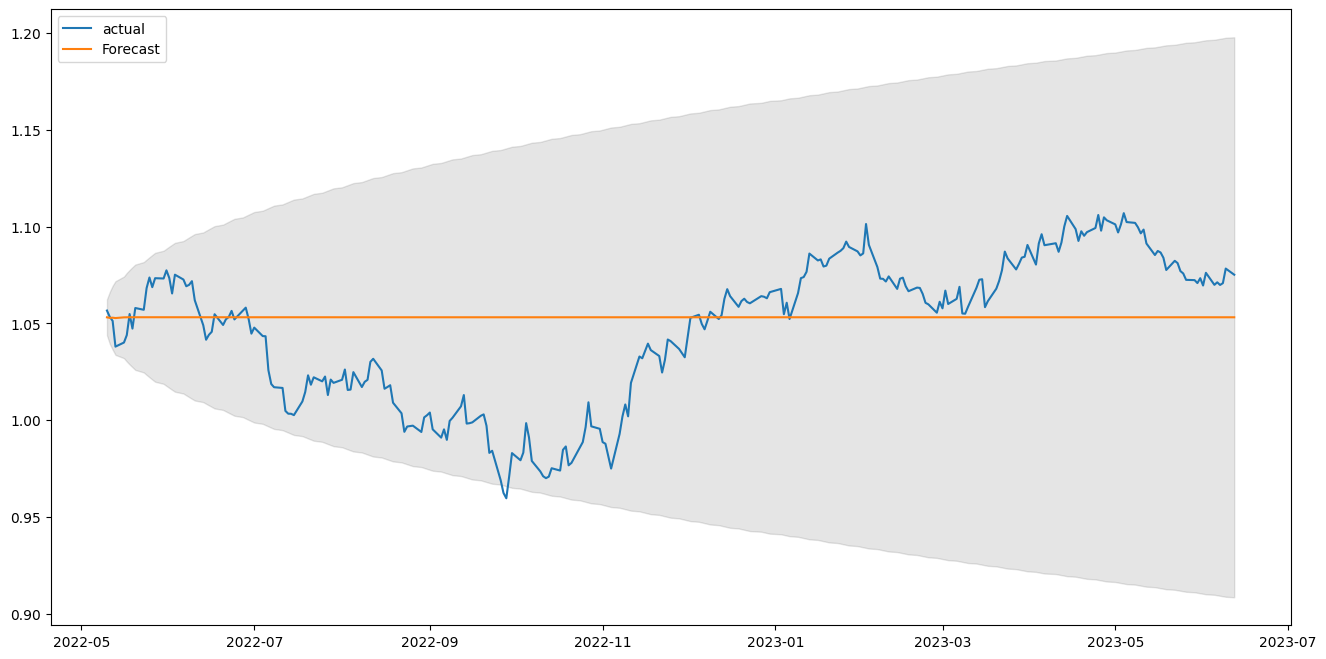

In [216]:
plt.figure(figsize=(16,8))
plt.plot(combined_data['USD_EUR_Price'],label="actual")
plt.plot(combined_data['Predicted_Value'],label="Forecast")
plt.fill_between(combined_data.index,combined_data['lower'],combined_data['Upper'],color='k',alpha=0.1)
plt.legend(loc="upper left")